<a href="https://colab.research.google.com/github/dontwhelve/SystemLogAnalysis/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Failed Attempts**


In [ ]:
import pandas as pd

# Load the CSV file containing the log data
csv_file_path = "/FileLogs/testlogs.csv"  # Path to your CSV file
log_data = pd.read_csv(csv_file_path)

# Define the Event ID for failed login attempts (e.g., 4625 for Windows)
failed_login_event_id = 4625

# Filter the log data for failed login attempts
failed_logins = log_data[(log_data["Event ID"] == failed_login_event_id) & (log_data["Level"] == "Information")]

# Select the relevant columns for analysis
columns_to_display = ["Event Time", "Event ID", "Level", "User", "Description", "Computer", "Process ID"]
failed_logins = failed_logins[columns_to_display]

# Display the filtered failed login attempts with column headers
print(f"{'Event Time': <30} {'Event ID': <10} {'Level': <15} {'User': <10} {'Description': <265} {'Computer': <10} {'Process ID'}")  # Print column headers
print("-" * 270)  # Print a separator line for clarity

for index, row in failed_logins.iterrows():
    # Print each row with formatted columns
    print(f"{row['Event Time']: <30} {row['Event ID']: <10} {row['Level']: <15} {row['User']: <10} {row['Description']: <100} {row['Computer']: <5} {row['Process ID']}")


Event Time                     Event ID   Level           User       Description                                                                                                                                                                                                                                                               Computer   Process ID
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
10/26/2024 11:39:05.994 PM     4625       Information     nan        The EventSystem sub system is suppressing duplicate event log entries for a duration of 86400 seconds.  The suppression timeout can be controlled by a REG_DWORD value named SuppressDuplicateDuration under the following registry key: HKLM\Software\Microsoft\EventSystem\EventLog. MSI   nan
10/26/2024 11:

#**Restricted Access**

In [ ]:
import pandas as pd

# Load the CSV file containing the log data
csv_file_path = "/FileLogs/testlogs.csv"  # Path to your CSV file
log_data = pd.read_csv(csv_file_path)

# Define the Event IDs for access to restricted files
restricted_file_access_event_ids = [4656, 4663]

# Filter the log data for access attempts to restricted files
restricted_access_attempts = log_data[
    (log_data["Event ID"].isin(restricted_file_access_event_ids))
]

# Check if any data is returned after filtering
if restricted_access_attempts.empty:
    print("\nNo data found for access to restricted files.")
else:
    # Select the relevant columns for analysis (only 5 columns)
    columns_to_display = ["Event Time", "Event ID", "User", "Description", "Computer"]
    restricted_access_attempts = restricted_access_attempts[columns_to_display]

    # Display the filtered access attempts with column headers
    print(f"\n{'Event Time': <30} {'Event ID': <10} {'User': <5} {'Description': <100} {'Computer'}")  # Print column headers
    print("-" * 270)  # Print a separator line for clarity

    # Display the first 10 rows directly
    print(restricted_access_attempts.head(10).to_string(index=False))



No data found for access to restricted files.


#**Unauthorized Access**


In [ ]:
import pandas as pd

# Load the CSV file containing the log data
csv_file_path = "/FileLogs/testlogs.csv"
log_data = pd.read_csv(csv_file_path)

# Define the Event IDs for unauthorized user actions
unauthorized_action_event_ids = [4625, 4661, 4663, 4672, 4675]

# Filter the log data for unauthorized actions
unauthorized_actions = log_data[
    (log_data["Event ID"].isin(unauthorized_action_event_ids))  # Check for specified Event IDs
]

# Check if any data is returned after filtering
if unauthorized_actions.empty:
    print("\nNo data found for unauthorized user actions.")
else:
    # Select the relevant columns for analysis (only specified columns)
    columns_to_display = ["Event Time", "Event ID", "User", "Description", "Keywords", "Computer"]
    unauthorized_actions = unauthorized_actions[columns_to_display]

    # Print column headers only once with reduced spacing
    print(f"\n{'Event Time':<20} {'Event ID':<10} {'User':<10} {'Description':<40} {'Keywords':<20} {'Computer':<15}")  # Print column headers
    print("-" * 150)  # Print a separator line for clarity

    # Display the first 5 rows directly with adjusted spacing
    print(unauthorized_actions.head(5).to_string(index=False, header=False))  # to_string(index=False, header=False) -> to avoid showing row indices and headers



Event Time           Event ID   User       Description                              Keywords             Computer       
------------------------------------------------------------------------------------------------------------------------------------------------------
10/26/2024 11:39:05.994 PM 4625 NaN                                                                                                                                                                                                                                                                                                          The EventSystem sub system is suppressing duplicate event log entries for a duration of 86400 seconds.  The suppression timeout can be controlled by a REG_DWORD value named SuppressDuplicateDuration under the following registry key: HKLM\Software\Microsoft\EventSystem\EventLog.       Classic MSI
10/26/2024 11:42:14.920 PM 4625 NaN                                                              

#**Combined Data**

In [ ]:
import pandas as pd

# Function to load data from a CSV file
def load_data(file_path):
    return pd.read_csv(file_path)  # Read the CSV file and return a DataFrame

# Function to filter failed login attempts from the log data
def filter_failed_logins(log_data):
    event_id = 4625  # Event ID for failed logins

    # Filter log data for failed login attempts with "Information" level
    return log_data[(log_data["Event ID"] == event_id) & (log_data["Level"] == "Information")]

# Function to filter access to restricted files
def filter_restricted_access(log_data):
    event_ids = [4656, 4663]  # Event IDs for restricted access attempts

    # Filter log data for restricted access attempts based on event IDs
    return log_data[log_data["Event ID"].isin(event_ids)]

# Function to filter unauthorized user actions
def filter_unauthorized_actions(log_data):
    event_ids = [4625, 4661, 4663, 4672, 4675]  # Event IDs for various unauthorized actions

    # Filter log data for unauthorized actions based on event IDs
    return log_data[log_data["Event ID"].isin(event_ids)]

# Function to display a DataFrame in a readable format
def display_data(dataframe, title):
    print(f"\n{title}:")

    print(dataframe.to_string(index=False))  # Print the DataFrame without row indices

# Main function to run the script
def main():
    csv_file_path = "/FileLogs/testlogs.csv"
    log_data = load_data(csv_file_path)  # Load log data from the CSV file

    # Filter the log data for different categories
    failed_logins = filter_failed_logins(log_data)  # Get failed login attempts
    restricted_access = filter_restricted_access(log_data)  # Get restricted access attempts
    unauthorized_actions = filter_unauthorized_actions(log_data)  # Get unauthorized actions

    # Check if there are any failed logins and display them
    if not failed_logins.empty:
        display_data(failed_logins, "Failed Login Attempts")

    # Check if there are any restricted access attempts and display them
    if not restricted_access.empty:
        display_data(restricted_access, "Access to Restricted Files")

    # Check if there are any unauthorized actions and display them
    if not unauthorized_actions.empty:
        display_data(unauthorized_actions, "Unauthorized User Actions")

# Run the main function when the script is executed
if __name__ == "__main__":
    main()


Failed Login Attempts:
                Event Time  Record ID  Event ID       Level     Channel                      Provider                                                                                                                                                                                                                                                                            Description Opcode Task Keywords  Process ID  Thread ID Computer User  Log File
10/26/2024 11:39:05.994 PM      11815      4625 Information Application Microsoft-Windows-EventSystem The EventSystem sub system is suppressing duplicate event log entries for a duration of 86400 seconds.  The suppression timeout can be controlled by a REG_DWORD value named SuppressDuplicateDuration under the following registry key: HKLM\Software\Microsoft\EventSystem\EventLog.    NaN  NaN  Classic         NaN        NaN      MSI  NaN       NaN
10/26/2024 11:42:14.920 PM      11886      4625 Information Application Micros

#**Visualization**

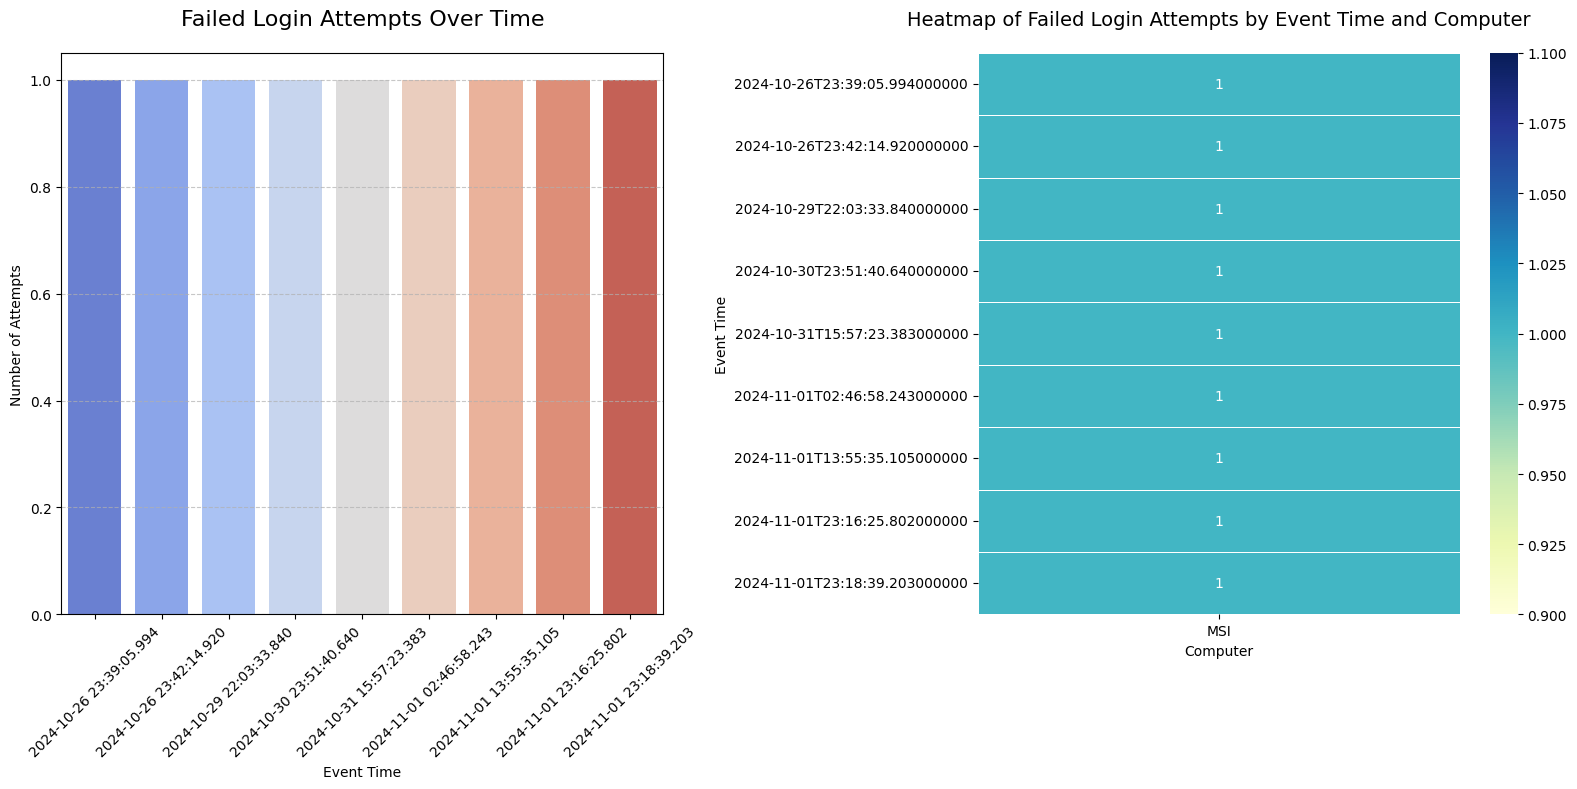

No access counts to plot.
No unauthorized actions to plot.


<Figure size 1400x600 with 0 Axes>

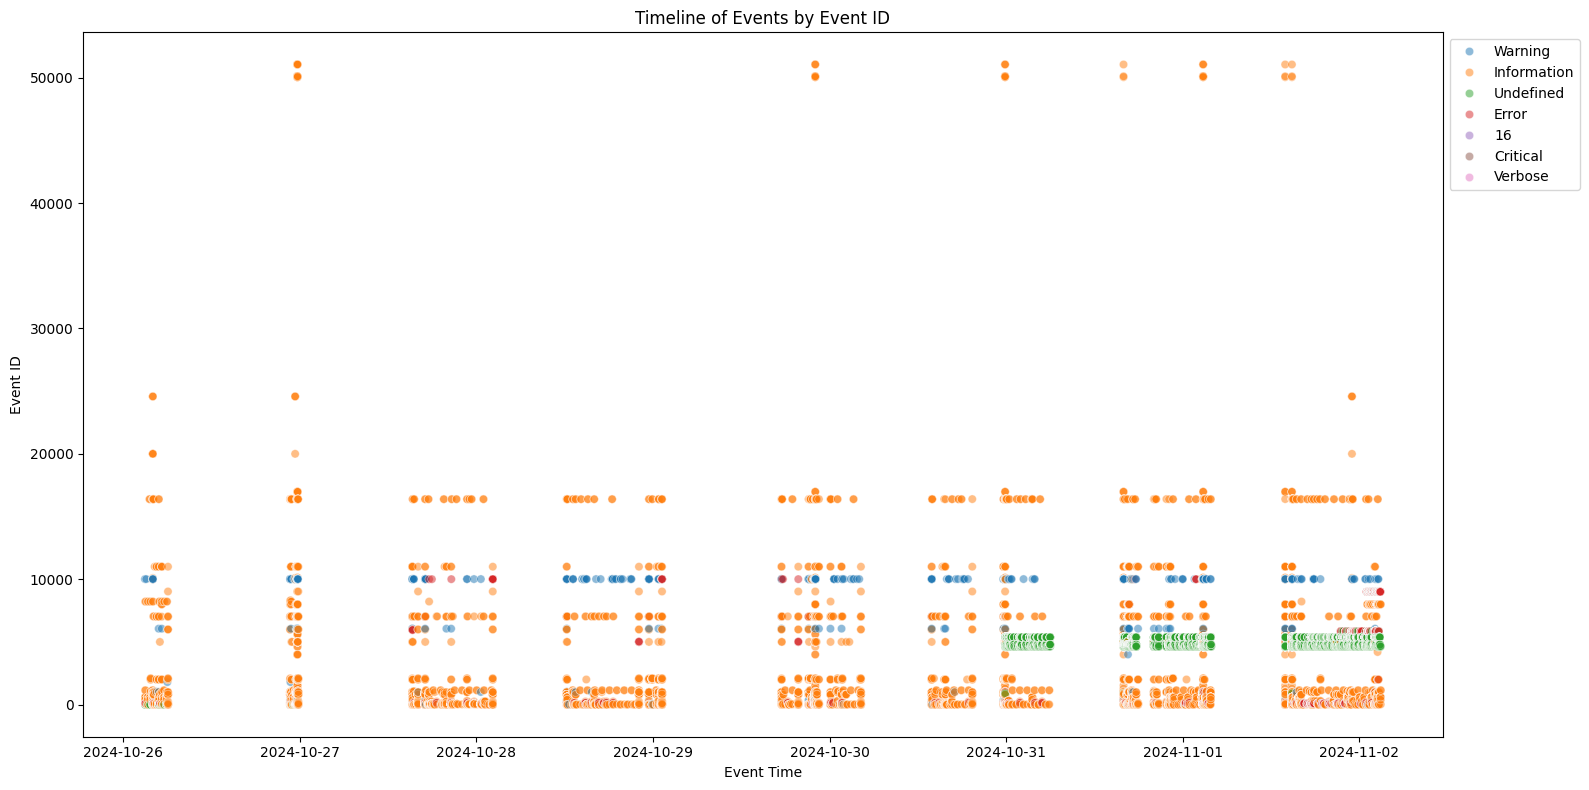

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the CSV file into a DataFrame
csv_file_path = '/FileLogs/testlogs.csv'  # Update with your actual file name
log_data = pd.read_csv(csv_file_path)

# Convert 'Event Time' to datetime if it is not already
log_data['Event Time'] = pd.to_datetime(log_data['Event Time'])

# Filter for relevant events
failed_logins = log_data[log_data['Event ID'] == 4625]  # Adjust as needed for failed logins
restricted_access = log_data[log_data['Event ID'] == 4663]  # Adjust as needed for access to restricted files
unauthorized_actions = log_data[log_data['Event ID'].isin([4661, 4663, 4672, 4675])]  # Adjust as needed

# 1. Failed Login Attempts Visualizations
def plot_failed_logins():
    if failed_logins.empty:
        print("No Failed Login Attempts to plot.")
        return

    plt.figure(figsize=(16, 8))

    # Bar Chart
    plt.subplot(1, 2, 1)
    sns.countplot(data=failed_logins, x='Event Time', hue='Event Time', order=failed_logins['Event Time'].value_counts().index, palette='coolwarm', legend=False)
    plt.title('Failed Login Attempts Over Time', fontsize=16, pad=20)
    plt.xticks(rotation=45)
    plt.ylabel('Number of Attempts')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Heatmap
    plt.subplot(1, 2, 2)
    heatmap_data = failed_logins.groupby(['Event Time', 'Computer']).size().unstack()
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5)
    plt.title('Heatmap of Failed Login Attempts by Event Time and Computer', fontsize=14, pad=20)
    plt.xlabel('Computer')
    plt.ylabel('Event Time')

    plt.tight_layout()
    plt.show()


# 2. Access to Restricted Files Visualizations
def plot_access_to_restricted_files():
    if restricted_access.empty:
        print("No access counts to plot.")
        return

    plt.figure(figsize=(16, 8))

    # Bar Chart
    plt.subplot(1, 2, 1)
    sns.countplot(data=restricted_access, x='User', order=restricted_access['User'].value_counts().index, palette='Set2')
    plt.title('Access Attempts to Restricted Files by User', fontsize=14)
    plt.xticks(rotation=45)

    # Scatter Plot
    plt.subplot(1, 2, 2)
    plt.scatter(restricted_access['Event Time'], restricted_access['Computer'], alpha=0.5, color='orange')
    plt.title('Access Attempts by Event Time and Computer', fontsize=14)
    plt.xlabel('Event Time')
    plt.ylabel('Computer')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


# 3. Unauthorized User Actions Visualizations
def plot_unauthorized_user_actions():
    if unauthorized_actions.empty:
        print("No unauthorized actions to plot.")
        return

    plt.figure(figsize=(14, 6))

    # Stacked Bar Chart
    if 'User' in unauthorized_actions.columns and 'Event ID' in unauthorized_actions.columns:
        action_count = unauthorized_actions.groupby(['User', 'Event ID']).size().unstack(fill_value=0)
        if action_count.empty:
            print("No unauthorized actions to plot.")
            return
        action_count.plot(kind='bar', stacked=True, ax=plt.gca())
        plt.title('Unauthorized Actions by User and Event ID')
        plt.ylabel('Number of Actions')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()
    else:
        print("No numeric data to plot for unauthorized actions.")

    # Line Graph
    plt.figure(figsize=(10, 5))
    if not unauthorized_actions['Event Time'].empty:
        action_counts_over_time = unauthorized_actions['Event Time'].value_counts().sort_index()
        if not action_counts_over_time.empty:
            sns.lineplot(data=action_counts_over_time)
            plt.title('Trends in Unauthorized Actions Over Time')
            plt.xlabel('Event Time')
            plt.ylabel('Number of Unauthorized Actions')
            plt.xticks(rotation=45)
        else:
            print("No trends in unauthorized actions to plot.")
    else:
        print("No Event Time data to plot unauthorized actions.")

    plt.tight_layout()
    plt.show()

# 4. Timeline of Events Visualizations
def plot_timeline_of_events():
    plt.figure(figsize=(16, 8))

    # Timeline Plot (Scatter)
    sns.scatterplot(data=log_data, x='Event Time', y='Event ID', hue='Level', alpha=0.5)

    # Move legend outside the plot
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the (1, 1) values as needed for positioning

    plt.title('Timeline of Events by Event ID')
    plt.xlabel('Event Time')
    plt.ylabel('Event ID')
    plt.tight_layout()
    plt.show()



# Execute all visualizations
plot_failed_logins()
plot_access_to_restricted_files()
plot_unauthorized_user_actions()
plot_timeline_of_events()
